In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df_bibliovid=pd.read_json('/content/drive/MyDrive/data/bibliovid.json')
df_bibliovid = df_bibliovid.dropna(subset=['abstract','topics'])
df_bibliovid = df_bibliovid.drop(df_bibliovid[ df_bibliovid.abstract==''].index)
df_bibliovid = df_bibliovid.drop(df_bibliovid[ df_bibliovid.topics==''].index)

In [3]:
def vectorize(label_list,dico):
    return [int(elt in label_list) for  elt in dico]

In [4]:
if True:
  spec_dict=dict()
  spec_list=[]
  for elt in df_bibliovid['specialties'].values:
      spec_list.append(elt[0]['name'])
  spec_set=set(spec_list)
  i=0
  for elt in spec_set:
    spec_dict[elt]=i
    i+=1
  print(spec_dict)
  df_bibliovid['vect_specs']=df_bibliovid.topics.apply(lambda x: vectorize(x,spec_dict))
  df_bibliovid['cat_text']=df_bibliovid['title']+df_bibliovid['abstract']
  df_bibliovid['len']=df_bibliovid['cat_text'].apply(lambda x: len(x.split(' ')))
  df_bibliovid['len_sentence']=df_bibliovid['cat_text'].apply(lambda x: len(x.split('.')))
  df_bibliovid=df_bibliovid.reset_index(drop=True)

{'Immunité': 0, 'Cardiologie et maladies métaboliques': 1, 'Hématologie': 2, 'Radiologie': 3, 'Transversale': 4, 'Hépato-gastro-entérologie': 5, 'Virologie': 6, 'Gynécologie Obstétrique': 7, 'Neurologie': 8, 'Psychiatrie': 9, 'Néphrologie': 10, 'Confinement/Déconfinement': 11, 'Pédiatrie': 12, 'Hygiène': 13, 'Anesthésie-Réanimation': 14, 'Gériatrie': 15, 'Infectiologie': 16}


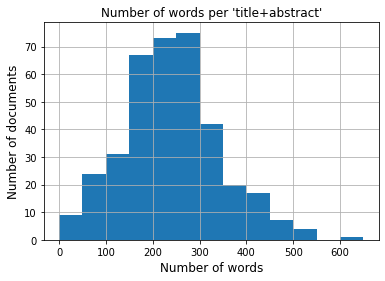

In [15]:
import numpy as np
import matplotlib.pyplot as plt
longueurs = df_bibliovid.len
longueurs.hist(bins = np.arange(0,700,50))
plt.title("Number of words per 'title+abstract'")
plt.ylabel('Number of documents', fontsize=12)
plt.xlabel('Number of words', fontsize=12)
plt.show()

On voit qu'en coupant à 200 tokens on enlève une gorsse partie de l'information disponible sur nos textes!

On crée une liste avec à l'indice i la liste des mots du texte concaténé d'indice i

In [7]:
texts = list(df_bibliovid['cat_text'].apply(lambda x: x.split(' ')))

In [8]:
texts[0]

['Body',
 'Mass',
 'Index',
 'and',
 'Risk',
 'for',
 'Intubation',
 'or',
 'Death',
 'in',
 'SARS-CoV-2',
 'Infection:',
 'A',
 'Retrospective',
 'Cohort',
 'StudyObesity',
 'is',
 'a',
 'risk',
 'factor',
 'for',
 'pneumonia',
 'and',
 'acute',
 'respiratory',
 'distress',
 'syndrome.\nTo',
 'determine',
 'whether',
 'obesity',
 'is',
 'associated',
 'with',
 'intubation',
 'or',
 'death,',
 'inflammation,',
 'cardiac',
 'injury,',
 'or',
 'fibrinolysis',
 'in',
 'coronavirus',
 'disease',
 '2019',
 '(COVID-19).\nRetrospective',
 'cohort',
 'study.\nA',
 'quaternary',
 'academic',
 'medical',
 'center',
 'and',
 'community',
 'hospital',
 'in',
 'New',
 'York',
 'City.\n2466',
 'adults',
 'hospitalized',
 'with',
 'laboratory-confirmed',
 'severe',
 'acute',
 'respiratory',
 'syndrome',
 'coronavirus',
 '2',
 'infection',
 'over',
 'a',
 '45-day',
 'period',
 'with',
 'at',
 'least',
 '47',
 'days',
 'of',
 'in-hospital',
 'observation.\nBody',
 'mass',
 'index',
 '(BMI),',
 'admissi

On coupe ces textes en deux, afin de réduire leur taille, ce qui permet également de doubler le nombre de données du dataset (on peut également couper les textes en 3, comme expliqué dans le rapport)

In [10]:
part1 = []
for i in range(len(texts)):
  a = texts[i][:len(texts[i])//2]
  a = " ".join(a)
  part1.append(a)

part2 = []
for i in range(len(texts)):
  b = texts[i][len(texts[i])//2:]
  b = " ".join(b)
  part2.append(b)

#part3 = []
#for i in range(len(texts)):
#  c = texts[i][2*len(texts[i])//3:]
#  c = " ".join(c)
#  part3.append(c)

In [9]:
df = df_bibliovid.copy()
df2 = df_bibliovid.copy()
#df3 = df_bibliovid.copy()

In [11]:
df['cat_text'] = part1
df

,id,slug,title,has_other_authors,impact_factor,goals_plain,verbose_date,authors,document_link,specialties,category,journal,link,results,synthesis,strength_of_evidence_details,goals,methods,pubmed_id,doi,abstract,topics,author_list,publication_date,vect_specs,cat_text,len,len_sentence
0,769,body-mass-index-and-risk-for-intubation-or-dea...,Body Mass Index and Risk for Intubation or Dea...,True,"{'id': 3, 'name': 'Intermédiaire', 'posts_coun...",- Déterminer si l'obésité est associée à l'int...,31.07.2020,Anderson MR,https://www.acpjournals.org/doi/10.7326/M20-3214,"[{'id': 4, 'name': 'Anesthésie-Réanimation'}, ...","{'id': 6, 'name': 'Pronostique', 'icon': 'icon...","{'id': 41, 'name': 'Ann Intern Med'}",https://www.acpjournals.org/doi/10.7326/M20-3214,*Description de l'échantillon: 2112 patients c...,- Environ 2-3% des patients atteints de la COV...,-cohorte pronostique- puissance de l'étude sup...,- Déterminer si l'obésité est associée à l'int...,Cohorte rétrospective portant sur 2466 patient...,32726151,10.7326/M20-3214,Obesity is a risk factor for pneumonia and acu...,"[Pronostique, Anesthésie-Réanimation, Infectio...","[{'id': 714, 'name': 'Anderson MR'}]",2020-07-31,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",Body Mass Index and Risk for Intubation or Dea...,259,18
1,742,an-mrna-vaccine-against-sars-cov-2-preliminary...,An mRNA Vaccine against SARS-CoV-2 - Prelimina...,True,"{'id': 3, 'name': 'Intermédiaire', 'posts_coun...",Développement du vaccin accéléré mRNA-1273 Mod...,15.07.2020,Jackson LA,https://www.nejm.org/doi/10.1056/NEJMoa2022483,"[{'id': 22, 'name': 'Immunité'}, {'id': 5, 'na...","{'id': 4, 'name': 'Thérapeutique', 'icon': 'ic...","{'id': 22, 'name': 'NEJM'}",https://www.nejm.org/doi/10.1056/NEJMoa2022483,"Après la première vaccination, les réponses an...",Le vaccin mRNA-1273 est plutôt bien toléré. De...,Les résultats du rapport ne sont que prélimina...,Développement du vaccin accéléré mRNA-1273 Mod...,"Essai de vaccination de Phase 1, ouvert inclua...",32663912,10.1056/NEJMoa2022483,The severe acute respiratory syndrome coronavi...,"[Thérapeutique, Immunité, Virologie, Infectiol...","[{'id': 690, 'name': 'Jackson LA'}]",2020-07-15,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",An mRNA Vaccine against SARS-CoV-2 - Prelimina...,269,14
2,739,pathophysiology-transmission-diagnosis-and-tre...,"Pathophysiology, Transmission, Diagnosis, and ...",True,"{'id': 2, 'name': 'Faible', 'posts_count': 505...",Etat des lieux bibliographique des connaissanc...,14.07.2020,Joost Wiersinga W,https://jamanetwork.com/journals/jama/fullarti...,"[{'id': 7, 'name': 'Transversale'}, {'id': 12,...","{'id': 2, 'name': 'Autres', 'icon': 'icon-other'}","{'id': 183, 'name': 'JAMA Network Open'}",https://jamanetwork.com/journals/jama/fullarti...,La transmission du SARS-CoV-2 est plus favorab...,Actualisation générale des connaissances (rech...,Revue orientée d'études pré-sélectionnées par ...,Etat des lieux bibliographique des connaissanc...,Bases de données indexées (générale et récente...,32648899,10.1001/jama.2020.12839,The coronavirus disease 2019 (COVID-19) pandem...,"[Autres, Transversale, Infectiologie]","[{'id': 687, 'name': 'Joost Wiersinga W'}]",2020-07-14,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","Pathophysiology, Transmission, Diagnosis, and ...",436,33
3,735,introductions-and-early-spread-of-sars-cov-2-i...,Introductions and Early Spread of SARS-CoV-2 i...,True,"{'id': 4, 'name': 'Indéterminé', 'posts_count'...",Etudier comment l'épidémie de SARS-Cov-2 a com...,10.07.2020,Gambaro F,https://www.eurosurveillance.org/content/10.28...,"[{'id': 7, 'name': 'Transversale'}, {'id': 5, ...","{'id': 5, 'name': 'Epidémiologique', 'icon': '...","{'id': 46, 'name': 'Eurosurveillance'}",https://www.eurosurveillance.org/content/10.28...,Le virus a été introduit plusieurs fois dans l...,Le virus SARS-Cov-2 a été introduit plusieurs ...,Les données de cette étude semblent disponible...,Etudier comment l'épidémie de SARS

In [12]:
df2['cat_text'] = part2
df2

,id,slug,title,has_other_authors,impact_factor,goals_plain,verbose_date,authors,document_link,specialties,category,journal,link,results,synthesis,strength_of_evidence_details,goals,methods,pubmed_id,doi,abstract,topics,author_list,publication_date,vect_specs,cat_text,len,len_sentence
0,769,body-mass-index-and-risk-for-intubation-or-dea...,Body Mass Index and Risk for Intubation or Dea...,True,"{'id': 3, 'name': 'Intermédiaire', 'posts_coun...",- Déterminer si l'obésité est associée à l'int...,31.07.2020,Anderson MR,https://www.acpjournals.org/doi/10.7326/M20-3214,"[{'id': 4, 'name': 'Anesthésie-Réanimation'}, ...","{'id': 6, 'name': 'Pronostique', 'icon': 'icon...","{'id': 41, 'name': 'Ann Intern Med'}",https://www.acpjournals.org/doi/10.7326/M20-3214,*Description de l'échantillon: 2112 patients c...,- Environ 2-3% des patients atteints de la COV...,-cohorte pronostique- puissance de l'étude sup...,- Déterminer si l'obésité est associée à l'int...,Cohorte rétrospective portant sur 2466 patient...,32726151,10.7326/M20-3214,Obesity is a risk factor for pneumonia and acu...,"[Pronostique, Anesthésie-Réanimation, Infectio...","[{'id': 714, 'name': 'Anderson MR'}]",2020-07-31,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","(interquartile range, 3 to 14 days), 533 patie...",259,18
1,742,an-mrna-vaccine-against-sars-cov-2-preliminary...,An mRNA Vaccine against SARS-CoV-2 - Prelimina...,True,"{'id': 3, 'name': 'Intermédiaire', 'posts_coun...",Développement du vaccin accéléré mRNA-1273 Mod...,15.07.2020,Jackson LA,https://www.nejm.org/doi/10.1056/NEJMoa2022483,"[{'id': 22, 'name': 'Immunité'}, {'id': 5, 'na...","{'id': 4, 'name': 'Thérapeutique', 'icon': 'ic...","{'id': 22, 'name': 'NEJM'}",https://www.nejm.org/doi/10.1056/NEJMoa2022483,"Après la première vaccination, les réponses an...",Le vaccin mRNA-1273 est plutôt bien toléré. De...,Les résultats du rapport ne sont que prélimina...,Développement du vaccin accéléré mRNA-1273 Mod...,"Essai de vaccination de Phase 1, ouvert inclua...",32663912,10.1056/NEJMoa2022483,The severe acute respiratory syndrome coronavi...,"[Thérapeutique, Immunité, Virologie, Infectiol...","[{'id': 690, 'name': 'Jackson LA'}]",2020-07-15,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","GMT, 299,751, 782,719, and 1,192,154, respecti...",269,14
2,739,pathophysiology-transmission-diagnosis-and-tre...,"Pathophysiology, Transmission, Diagnosis, and ...",True,"{'id': 2, 'name': 'Faible', 'posts_count': 505...",Etat des lieux bibliographique des connaissanc...,14.07.2020,Joost Wiersinga W,https://jamanetwork.com/journals/jama/fullarti...,"[{'id': 7, 'name': 'Transversale'}, {'id': 12,...","{'id': 2, 'name': 'Autres', 'icon': 'icon-other'}","{'id': 183, 'name': 'JAMA Network Open'}",https://jamanetwork.com/journals/jama/fullarti...,La transmission du SARS-CoV-2 est plus favorab...,Actualisation générale des connaissances (rech...,Revue orientée d'études pré-sélectionnées par ...,Etat des lieux bibliographique des connaissanc...,Bases de données indexées (générale et récente...,32648899,10.1001/jama.2020.12839,The coronavirus disease 2019 (COVID-19) pandem...,"[Autres, Transversale, Infectiologie]","[{'id': 687, 'name': 'Joost Wiersinga W'}]",2020-07-14,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",for supportive management of acute hypoxic res...,436,33
3,735,introductions-and-early-spread-of-sars-cov-2-i...,Introductions and Early Spread of SARS-CoV-2 i...,True,"{'id': 4, 'name': 'Indéterminé', 'posts_count'...",Etudier comment l'épidémie de SARS-Cov-2 a com...,10.07.2020,Gambaro F,https://www.eurosurveillance.org/content/10.28...,"[{'id': 7, 'name': 'Transversale'}, {'id': 5, ...","{'id': 5, 'name': 'Epidémiologique', 'icon': '...","{'id': 46, 'name': 'Eurosurveillance'}",https://www.eurosurveillance.org/content/10.28...,Le virus a été introduit plusieurs fois dans l...,Le virus SARS-Cov-2 a été introduit plusieurs ...,Les données de cette étude semblent disponible...,Etudier comment l'épidémie de SA

In [ ]:
#df3['cat_text'] = part3
#df3

In [13]:
df_bibliovid_augmented = pd.concat([df,df2], ignore_index=True) #on peut rajouter le df3 si on veut couper les texte en trois
df_bibliovid_augmented

,id,slug,title,has_other_authors,impact_factor,goals_plain,verbose_date,authors,document_link,specialties,category,journal,link,results,synthesis,strength_of_evidence_details,goals,methods,pubmed_id,doi,abstract,topics,author_list,publication_date,vect_specs,cat_text,len,len_sentence
0,769,body-mass-index-and-risk-for-intubation-or-dea...,Body Mass Index and Risk for Intubation or Dea...,True,"{'id': 3, 'name': 'Intermédiaire', 'posts_coun...",- Déterminer si l'obésité est associée à l'int...,31.07.2020,Anderson MR,https://www.acpjournals.org/doi/10.7326/M20-3214,"[{'id': 4, 'name': 'Anesthésie-Réanimation'}, ...","{'id': 6, 'name': 'Pronostique', 'icon': 'icon...","{'id': 41, 'name': 'Ann Intern Med'}",https://www.acpjournals.org/doi/10.7326/M20-3214,*Description de l'échantillon: 2112 patients c...,- Environ 2-3% des patients atteints de la COV...,-cohorte pronostique- puissance de l'étude sup...,- Déterminer si l'obésité est associée à l'int...,Cohorte rétrospective portant sur 2466 patient...,32726151,10.7326/M20-3214,Obesity is a risk factor for pneumonia and acu...,"[Pronostique, Anesthésie-Réanimation, Infectio...","[{'id': 714, 'name': 'Anderson MR'}]",2020-07-31,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",Body Mass Index and Risk for Intubation or Dea...,259,18
1,742,an-mrna-vaccine-against-sars-cov-2-preliminary...,An mRNA Vaccine against SARS-CoV-2 - Prelimina...,True,"{'id': 3, 'name': 'Intermédiaire', 'posts_coun...",Développement du vaccin accéléré mRNA-1273 Mod...,15.07.2020,Jackson LA,https://www.nejm.org/doi/10.1056/NEJMoa2022483,"[{'id': 22, 'name': 'Immunité'}, {'id': 5, 'na...","{'id': 4, 'name': 'Thérapeutique', 'icon': 'ic...","{'id': 22, 'name': 'NEJM'}",https://www.nejm.org/doi/10.1056/NEJMoa2022483,"Après la première vaccination, les réponses an...",Le vaccin mRNA-1273 est plutôt bien toléré. De...,Les résultats du rapport ne sont que prélimina...,Développement du vaccin accéléré mRNA-1273 Mod...,"Essai de vaccination de Phase 1, ouvert inclua...",32663912,10.1056/NEJMoa2022483,The severe acute respiratory syndrome coronavi...,"[Thérapeutique, Immunité, Virologie, Infectiol...","[{'id': 690, 'name': 'Jackson LA'}]",2020-07-15,"[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",An mRNA Vaccine against SARS-CoV-2 - Prelimina...,269,14
2,739,pathophysiology-transmission-diagnosis-and-tre...,"Pathophysiology, Transmission, Diagnosis, and ...",True,"{'id': 2, 'name': 'Faible', 'posts_count': 505...",Etat des lieux bibliographique des connaissanc...,14.07.2020,Joost Wiersinga W,https://jamanetwork.com/journals/jama/fullarti...,"[{'id': 7, 'name': 'Transversale'}, {'id': 12,...","{'id': 2, 'name': 'Autres', 'icon': 'icon-other'}","{'id': 183, 'name': 'JAMA Network Open'}",https://jamanetwork.com/journals/jama/fullarti...,La transmission du SARS-CoV-2 est plus favorab...,Actualisation générale des connaissances (rech...,Revue orientée d'études pré-sélectionnées par ...,Etat des lieux bibliographique des connaissanc...,Bases de données indexées (générale et récente...,32648899,10.1001/jama.2020.12839,The coronavirus disease 2019 (COVID-19) pandem...,"[Autres, Transversale, Infectiologie]","[{'id': 687, 'name': 'Joost Wiersinga W'}]",2020-07-14,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","Pathophysiology, Transmission, Diagnosis, and ...",436,33
3,735,introductions-and-early-spread-of-sars-cov-2-i...,Introductions and Early Spread of SARS-CoV-2 i...,True,"{'id': 4, 'name': 'Indéterminé', 'posts_count'...",Etudier comment l'épidémie de SARS-Cov-2 a com...,10.07.2020,Gambaro F,https://www.eurosurveillance.org/content/10.28...,"[{'id': 7, 'name': 'Transversale'}, {'id': 5, ...","{'id': 5, 'name': 'Epidémiologique', 'icon': '...","{'id': 46, 'name': 'Eurosurveillance'}",https://www.eurosurveillance.org/content/10.28...,Le virus a été introduit plusieurs fois dans l...,Le virus SARS-Cov-2 a été introduit plusieurs ...,Les données de cette étude semblent disponible...,Etudier comment l'épidémie de SARS

In [18]:
texts = list(df_bibliovid_augmented['cat_text'].apply(lambda x: len(x.split(' '))))
df_bibliovid_augmented['len'] = texts

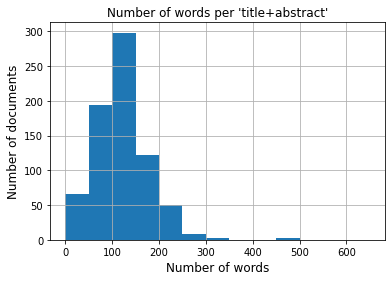

In [19]:
import matplotlib.pyplot as plt
longueurs = df_bibliovid_augmented.len
longueurs.hist(bins = np.arange(0,700,50))
plt.title("Number of words per 'title+abstract'")
plt.ylabel('Number of documents', fontsize=12)
plt.xlabel('Number of words', fontsize=12)
plt.show()

On voit ici que couper nos nouveaux textes ne font que très rarement plus de 200 tokens, on limoite considérablement la perte d'information, ce qui entraine les meilleurs résultats que nous avons ( voir tableau dans la "partie III Améliorations implémentées" du rapport). En plus de ça, on a pu doubler le nombre de nos données passant de 371 à 742, ce qui explique également l'augmentation obtenue